In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(1234)
x = np.random.uniform(0, 3, size=50)
y = 0.5 * x + 1 + 0.2*np.random.normal(size=50)

X = x.reshape(-1, 1)

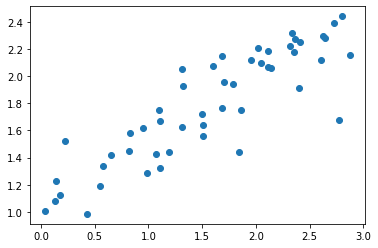

In [4]:
plt.plot(x, y, 'o')

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

def score_mse(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return mean_squared_error(y_pred, y_test)

def score_r2(model, X_test, y_test):
    return model.score(X_test, y_test)

score = score_mse
score = score_r2

model = LinearRegression()
model.fit(X_train, y_train)
score_full = score(model, X_test, y_test)
score_full

0.6945121828134233

# Our approach

1. Split data into train and test data
2. Bootstrap on training set and evaluate on fixed test data

Leads to bootstrap estimates that are negatively biased, since bootstrapped estimator sees less data to train on (famous 63.2% percentage).

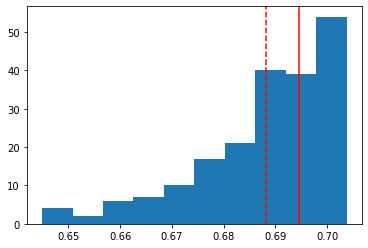

In [6]:
from mlxtend.evaluate import BootstrapOutOfBag

n_splits = 200

scores = np.empty(n_splits)
oob = BootstrapOutOfBag(n_splits=n_splits)

for i, (bootstrap, _) in enumerate(oob.split(X_train)):
    model = LinearRegression()
    model.fit(X_train[bootstrap], y_train[bootstrap])
    scores[i] = score(model, X_test, y_test)
    
plt.hist(scores)
plt.axvline(score_full, color="red")
plt.axvline(np.mean(scores), color="red", linestyle="dashed")

In [7]:
# Gap between bootstrap estimate and point estimate
score_full - np.mean(scores)

0.006411759395608452

In [8]:
def experiment(n_splits=200):

    scores = np.empty(n_splits)
    oob = BootstrapOutOfBag(n_splits=n_splits)
    
    for i, (bootstrap, _) in enumerate(oob.split(X_train)):
        model = LinearRegression()
        model.fit(X_train[bootstrap], y_train[bootstrap])
        scores[i] = score(model, X_test, y_test)

    return np.mean(scores)


experiment_scores = np.array([experiment() for _ in range(100)])

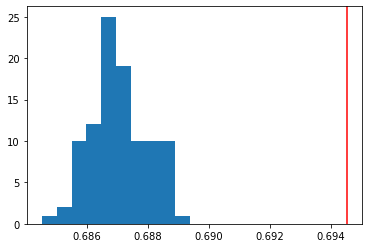

In [9]:
plt.hist(experiment_scores)
plt.axvline(score_full, color="red")

# Leave-one-out bootstrapping

In [10]:
X.shape

(50, 1)

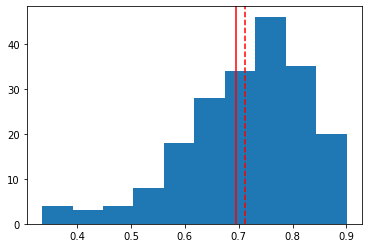

In [11]:
from mlxtend.evaluate import BootstrapOutOfBag

n_splits = 200

scores = np.empty(n_splits)
oob = BootstrapOutOfBag(n_splits=n_splits)

for i, (train, test) in enumerate(oob.split(X)):
    model = LinearRegression()
    model.fit(X[train], y[train])
    scores[i] = score(model, X[test], y[test])
    
plt.hist(scores)
plt.axvline(score_full, color="red")
plt.axvline(np.mean(scores), color="red", linestyle="dashed")

In [12]:
def experiment(n_splits=200):
    scores_b = np.empty(n_splits)  # bootstrap scores
    scores_r = np.empty(n_splits)  # resubstitution scores
    oob = BootstrapOutOfBag(n_splits=n_splits)

    for i, (train, test) in enumerate(oob.split(X)):
        model = LinearRegression()
        model.fit(X[train], y[train])
        scores_b[i] = score(model, X[test], y[test])
        scores_r[i] = score(model, X, y)
    
    return np.mean(scores_b), np.mean(scores_r)

In [13]:
agg_scores_b, agg_scores_r = np.asarray([experiment() for _ in range(100)]).T

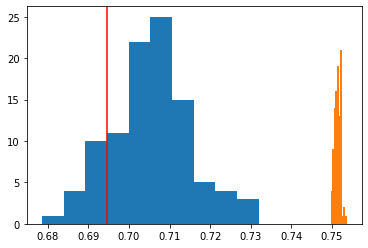

In [14]:
plt.hist(agg_scores_b)
plt.hist(agg_scores_r)
plt.axvline(score_full, color="red")